Практикум номер 1 з дисципліни Інтелектуальний аналіз великих сховищ даних, виконав студент Ка-32МП Гулкевич борис

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

Датасет - https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Номінальні ознаки - person_home_ownership, loan_intent

In [5]:
df[['person_home_ownership','loan_intent']]

,person_home_ownership,loan_intent
0,RENT,PERSONAL
1,OWN,EDUCATION
2,MORTGAGE,MEDICAL
3,RENT,MEDICAL
4,RENT,MEDICAL
...,...,...
32576,MORTGAGE,PERSONAL
32577,MORTGAGE,PERSONAL
32578,RENT,HOMEIMPROVEMENT
32579,MORTGAGE,PERSONAL


In [6]:
coded = pd.get_dummies(df[['person_home_ownership','loan_intent']])
df = df.drop(columns=['person_home_ownership','loan_intent'])
df = df.join(coded)
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,C,5800,13.16,0,0.11,N,30,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,A,17625,7.49,0,0.15,N,19,1,0,0,0,0,0,0,0,1,0
32578,65,76000,3.0,B,35000,10.99,1,0.46,N,28,0,0,0,1,0,0,1,0,0,0
32579,56,150000,5.0,B,15000,11.48,0,0.10,N,26,1,0,0,0,0,0,0,0,1,0


Порядкові - loan_grade, cb_person_default_on_file

In [7]:
df[['loan_grade', 'cb_person_default_on_file']]

,loan_grade,cb_person_default_on_file
0,D,Y
1,B,N
2,C,N
3,C,N
4,C,Y
...,...,...
32576,C,N
32577,A,N
32578,B,N
32579,B,N


In [8]:
class_le1 = LabelEncoder()
y1 = class_le1.fit_transform(df['loan_grade'].values)
y1

array([3, 1, 2, ..., 1, 1, 1])

In [9]:
class_le2 = LabelEncoder()
y2 = class_le2.fit_transform(df['cb_person_default_on_file'].values)
y2

array([1, 0, 0, ..., 0, 0, 0])

In [10]:
df['loan_grade']=y1
df['cb_person_default_on_file']=y2
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,1,0,0,0,0,0,0,0,1,0
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,0,0,0,1,0,0,1,0,0,0
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,1,0,0,0,0,0,0,0,1,0


Першу частину лабораторної виконано

Датасет другої частини - https://archive.ics.uci.edu/dataset/172/ozone+level+detection

In [12]:
from ucimlrepo import fetch_ucirepo 

In [16]:
ozone_level_detection = fetch_ucirepo(id=172)
X = ozone_level_detection.data.features 
y = ozone_level_detection.data.targets 

In [17]:
X

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.4,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00
5066,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.0,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00
5067,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.8,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00
5068,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.8,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05


In [20]:
X.columns

Index(['WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8',
       'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16',
       'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK',
       'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19',
       'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85',
       'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50',
       'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp'],
      dtype='object')

In [22]:
X.isna().sum()

WSR0     598
WSR1     584
WSR2     588
WSR3     584
WSR4     586
        ... 
KI       272
TT       250
SLP      190
SLP_     317
Precp      4
Length: 72, dtype: int64

In [23]:
data = X.values

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer

Simple imputer

Замінимо середніми значенням

In [30]:
imr1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imr1 = imr1.fit(data)
imputed_data = imr1.transform(data)
imputed_data

array([[ 8.0000e-01,  1.8000e+00,  2.4000e+00, ...,  1.0330e+04,
        -5.5000e+01,  0.0000e+00],
       [ 2.8000e+00,  3.2000e+00,  3.3000e+00, ...,  1.0275e+04,
        -5.5000e+01,  0.0000e+00],
       [ 2.9000e+00,  2.8000e+00,  2.6000e+00, ...,  1.0235e+04,
        -4.0000e+01,  0.0000e+00],
       ...,
       [ 8.0000e-01,  8.0000e-01,  1.2000e+00, ...,  1.0275e+04,
        -3.5000e+01,  0.0000e+00],
       [ 1.3000e+00,  9.0000e-01,  1.5000e+00, ...,  1.0245e+04,
        -3.0000e+01,  5.0000e-02],
       [ 1.5000e+00,  1.3000e+00,  1.8000e+00, ...,  1.0220e+04,
        -2.5000e+01,  0.0000e+00]])

Виведемо значення

In [31]:
imr1.statistics_

array([ 1.64072004e+00,  1.58689255e+00,  1.54609549e+00,  1.52683905e+00,
        1.52285905e+00,  1.54266607e+00,  1.63805704e+00,  2.04772930e+00,
        2.53975501e+00,  2.84815391e+00,  2.97033823e+00,  3.01676326e+00,
        3.04448399e+00,  3.10716511e+00,  3.17801513e+00,  3.23152512e+00,
        3.19335851e+00,  2.93530195e+00,  2.56204980e+00,  2.28631297e+00,
        2.09031682e+00,  1.93925067e+00,  1.80474273e+00,  1.70958445e+00,
        4.17256852e+00,  2.31549514e+00,  1.86527505e+01,  1.83513830e+01,
        1.80645443e+01,  1.78249894e+01,  1.76149724e+01,  1.74792092e+01,
        1.75932185e+01,  1.84221088e+01,  1.97831064e+01,  2.12211489e+01,
        2.24666383e+01,  2.33975032e+01,  2.40291347e+01,  2.44369667e+01,
        2.47088348e+01,  2.47237862e+01,  2.44010634e+01,  2.36354654e+01,
        2.25131221e+01,  2.14289305e+01,  2.06186701e+01,  2.00349149e+01,
        1.95060819e+01,  1.90657289e+01,  2.55817585e+01,  2.08441525e+01,
        1.35778120e+01,  

Тепер візьмемо медіанне значення для заміни

In [32]:
imr2 = SimpleImputer(missing_values=np.nan, strategy='median')
imr2 = imr1.fit(data)
imputed_data = imr1.transform(data)
imr2.statistics_

array([ 1.64072004e+00,  1.58689255e+00,  1.54609549e+00,  1.52683905e+00,
        1.52285905e+00,  1.54266607e+00,  1.63805704e+00,  2.04772930e+00,
        2.53975501e+00,  2.84815391e+00,  2.97033823e+00,  3.01676326e+00,
        3.04448399e+00,  3.10716511e+00,  3.17801513e+00,  3.23152512e+00,
        3.19335851e+00,  2.93530195e+00,  2.56204980e+00,  2.28631297e+00,
        2.09031682e+00,  1.93925067e+00,  1.80474273e+00,  1.70958445e+00,
        4.17256852e+00,  2.31549514e+00,  1.86527505e+01,  1.83513830e+01,
        1.80645443e+01,  1.78249894e+01,  1.76149724e+01,  1.74792092e+01,
        1.75932185e+01,  1.84221088e+01,  1.97831064e+01,  2.12211489e+01,
        2.24666383e+01,  2.33975032e+01,  2.40291347e+01,  2.44369667e+01,
        2.47088348e+01,  2.47237862e+01,  2.44010634e+01,  2.36354654e+01,
        2.25131221e+01,  2.14289305e+01,  2.06186701e+01,  2.00349149e+01,
        1.95060819e+01,  1.90657289e+01,  2.55817585e+01,  2.08441525e+01,
        1.35778120e+01,  

In [34]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Тепер замінимо значенням, яке зустрічається найчастіше

In [38]:
imr3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr3 = imr1.fit(data)
imputed_data = imr3.transform(data)
imr3.statistics_

array([ 1.64072004e+00,  1.58689255e+00,  1.54609549e+00,  1.52683905e+00,
        1.52285905e+00,  1.54266607e+00,  1.63805704e+00,  2.04772930e+00,
        2.53975501e+00,  2.84815391e+00,  2.97033823e+00,  3.01676326e+00,
        3.04448399e+00,  3.10716511e+00,  3.17801513e+00,  3.23152512e+00,
        3.19335851e+00,  2.93530195e+00,  2.56204980e+00,  2.28631297e+00,
        2.09031682e+00,  1.93925067e+00,  1.80474273e+00,  1.70958445e+00,
        4.17256852e+00,  2.31549514e+00,  1.86527505e+01,  1.83513830e+01,
        1.80645443e+01,  1.78249894e+01,  1.76149724e+01,  1.74792092e+01,
        1.75932185e+01,  1.84221088e+01,  1.97831064e+01,  2.12211489e+01,
        2.24666383e+01,  2.33975032e+01,  2.40291347e+01,  2.44369667e+01,
        2.47088348e+01,  2.47237862e+01,  2.44010634e+01,  2.36354654e+01,
        2.25131221e+01,  2.14289305e+01,  2.06186701e+01,  2.00349149e+01,
        1.95060819e+01,  1.90657289e+01,  2.55817585e+01,  2.08441525e+01,
        1.35778120e+01,  

In [37]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Розглянемо заміну константою, спершу нулем

In [41]:
imr4 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
imr4 = imr4.fit(data)
imputed_data = imr4.transform(data)
imr4.statistics_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [42]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Можна побачити, що все все заміняється нулем у обох колонках. Тепер розглянемо зі значенням 10

In [43]:
imr5 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=10)
imr5 = imr5.fit(data)
imputed_data = imr5.transform(data)
imr5.statistics_

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.])

In [44]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Отримані результати для заміни на 10. Спробуємо ще заміну на 7.

In [45]:
imr6 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=7)
imr6 = imr6.fit(data)
imputed_data = imr6.transform(data)
imr6.statistics_

array([7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7.])

In [46]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Далі розглянемо KNNImputer.

In [49]:
knn = KNNImputer(n_neighbors=2)
knn= knn.fit(data)
imputed_data = knn.transform(data)
knn.n_features_in_

72

In [51]:
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

In [52]:
knn = KNNImputer(n_neighbors=5)
knn= knn.fit(data)
imputed_data = knn.transform(data)
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

In [53]:
imr2_2 = KNNImputer(n_neighbors=5,weights='distance')
imr2_2= imr2_2.fit(data)
imputed_data2 = imr2_2.transform(data)
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Тепер розглянемо IterativeImputer, для початку зі стандартними параметрами estimator = BayesianRidge, initial strategy = mean, тобто середнє

In [54]:
imr_i1 = IterativeImputer()
imputed_data_i1 = imr_i1.fit_transform(data)
df1 = pd.DataFrame(imputed_data,columns=X.columns)
df1.isna().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Далі розглянемо інші варіанти initial strategy

In [55]:
imr_i22 = IterativeImputer(initial_strategy='most_frequent')
imputed_data_i22 = imr_i22.fit_transform(data)
df1 = pd.DataFrame(imputed_data_i22,columns=X.columns)
df1.isna().sum()

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

In [56]:
imr_i33 = IterativeImputer(initial_strategy='median')
imputed_data_i33 = imr_i33.fit_transform(data)
df1 = pd.DataFrame(imputed_data_i33,columns=X.columns)
df1.isna().sum()

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
KI       0
TT       0
SLP      0
SLP_     0
Precp    0
Length: 72, dtype: int64

Перейдемо до оцінки з конвеєрів. Було обрано KNeighborsRegressor у якості оцінщика та MSE

In [57]:
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [75]:
scores = np.zeros([12])

In [66]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    KNeighborsRegressor()
)

scores = cross_val_score(pipeline, data, y, scoring='neg_mean_squared_error', cv=2)

array([-0.05106114, -0.03021696])

In [70]:
estimators = [SimpleImputer(strategy='mean'), 
              SimpleImputer(missing_values=np.nan, strategy='median'),
              SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0),
                SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=10),
                SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=7),
                KNNImputer(n_neighbors=2), KNNImputer(n_neighbors=5),
                KNNImputer(n_neighbors=5,weights='distance'),
                IterativeImputer(),
                IterativeImputer(initial_strategy='most_frequent'),
                IterativeImputer(initial_strategy='median')
               ]

In [76]:
for i in range(12):
    pipeline = make_pipeline(
    estimators[i],
    KNeighborsRegressor()
    )
    scores[i] = max(cross_val_score(pipeline, data, y, scoring='neg_mean_squared_error', cv=2))*(-1)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [77]:
print(scores)

[0.03021696 0.0301854  0.0298856  0.03100592 0.03070611 0.03114793
 0.03136884 0.03078501 0.03054832 0.030643   0.03002761 0.0301854 ]


Вище отримано оцінки роботи при різних алгоритмах по заміні пропущених значень. Тепер зробимо таблицю для виведення графіка

In [81]:
columns = ['SimpleImputer mean', 'SimpleImputer median', 'SimpleImputer most_frequent',
                'SimpleImputer const=0', 'SimpleImputer const=10', 'SimpleImputer const=7',
                'KNNImputer(n_neighbors=2)', 'KNNImputer(n_neighbors=5)',
                'KNNImputer(n_neighbors=5,distance)',
                'IterativeImputer',
                'IterativeImputer most_frequent',
                'IterativeImputermedian']

In [82]:
fdf = pd.Series(scores,index=columns)

<AxesSubplot: >

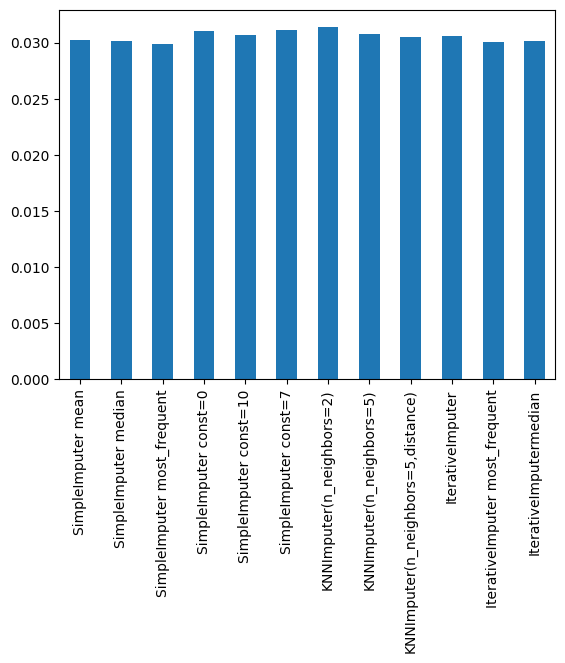

In [84]:
fdf.plot(kind = 'bar')

Найгірший результат - у KNNImputer з n_neighbors=2

In [85]:
max(scores)

0.03136883629191322

In [89]:
fdf.idxmax()

'KNNImputer(n_neighbors=2)'

Найкращий результат - SimpleImputer most_frequent

In [86]:
min(scores)

0.029885601577909274

In [91]:
fdf.idxmin()

'SimpleImputer most_frequent'

Виведемо різницю між макс і мін

In [92]:
max(scores)-min(scores)

0.0014832347140039462

Висновки

Отже, у роботі було розглянуто два датасети. У першому було замінено номінальні та порядкові ознаки. У тому датасеті були також і пропущені значення, але вони були у числових полях і не заважали виконанню завдання першої частини, а у другій не використовувалися через проблеми з обчисленням, які я не зміг виправити

Щодо заповнення пропущених значень, то для мого датасета найкраще себе показав simpleImputer, що заповнює значення тими, які найчастіше зустрічаються у колонці. Найгірше себе показав метод KNNimputer з кількістю сусідів 2. Варто уточнити, що різниця між ними складає близько 0.0015, тому залежно від потрібної точності методи можуть бути не так важливі. Загалом, з графіку можна побачити, що iterative imputer показав себе краще за knn imputer i всі simple imputer крім того, що використовує найчастіші значення 